# 1. Create Dataset



## 1.1 Dataset-1

In [1]:
import numpy as np
import random

x1 = np.array([i*(np.pi/180) for i in range (0,360,4)])
size1 = len(x1)
np.random.seed(10)
y1 = np.sin(x1) + np.random.normal(0,0.15,len(x1))

## 1.2 Plotting Dataset-1

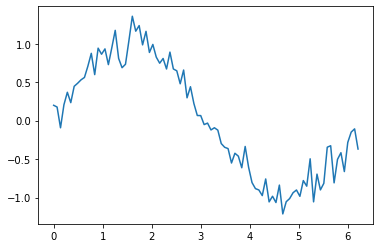

In [2]:
import matplotlib.pyplot as plt

plt.plot(x1, y1)
plt.show()

## 1.3 Dataset-2

#### 1.3.a Sampling x from GMM



(1000, 1)


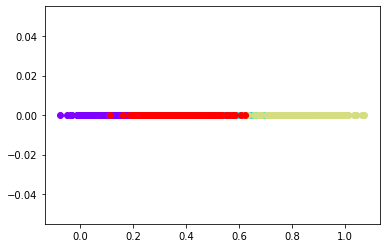

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture

def genXFromGMM(k, dim, size):
  gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=0).fit(np.random.rand(10000, dim))
  (x2, Y) = gmm.sample(size) #x2.shape=(size, dim); Y.shape=(size,)
  return (x2, Y)

# Generating X
# change the generating params here only
k = 4
dim2 = 1
size2 = 1000
(x2, Y) = genXFromGMM(k, dim2, size2)
print(x2.shape)
# Plotting X
colors = plt.cm.rainbow(np.linspace(0, 1, k))
if dim2==1 or dim2==2:
  for i in range(size2):
    for j in range(k):
      if Y[i] == j:
        if dim2 == 1:
          plt.scatter(x2[i][0], 0, color=colors[j])
        elif dim2 == 2:
          plt.scatter(x2[i][0], x2[i][1], color=colors[j])
  plt.show()

#### 1.3.b Sampling y from N(WTX,σ)

(1000, 1)


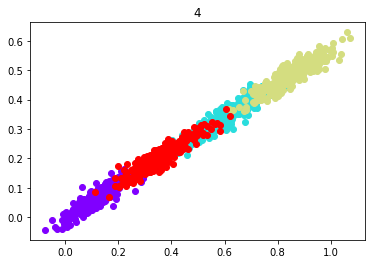

In [5]:
def genYFromNWTX(dim, size, x2, var):
  W = np.random.rand(1, dim)
  x2 = x2.reshape(dim, size)
  Wtx = np.dot(W, x2)
  y2 = []
  for i in range(size):
    y2.append(np.random.normal(Wtx[0,i], var, 1))
  y2 = np.asarray(y2)
  return y2

# Generating Y
var = 0.02
y2 = genYFromNWTX(dim2, size2, x2, var)
print(y2.shape)
# plotting X, Y
if dim2==1:
  colors = plt.cm.rainbow(np.linspace(0, 1, k))
  plt.title(k)
  for i in range(size2):
    for j in range(k):
      if Y[i] == j:
          plt.scatter(x2[i], y2[i], color=colors[j])
  plt.show()

#### 1.3.c Sampling X,Y for K different guassian distributions


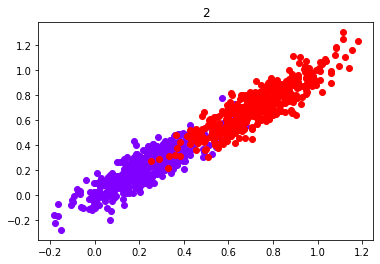

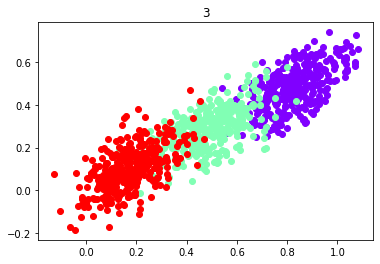

In [6]:
for K in range(2, 6):
  var = np.random.rand()/10
  (x2, Y) = genXFromGMM(K, dim2, size2)
  y2 = genYFromNWTX(dim2, size2, x2, var)
  if dim2==1:
    colors = plt.cm.rainbow(np.linspace(0, 1, K))
    plt.title(K)
    for i in range(size2):
      for j in range(K):
        if Y[i] == j:
            plt.scatter(x2[i], y2[i], color=colors[j])
    plt.show()

# 2. Implement Ridge Regression

## 2.1 Ridge Regression for dataset-1

#### 2.1.a Generating data, 15 powers of x1

In [7]:
import pandas as pd
data1 = pd.DataFrame(np.column_stack([x1,y1]),columns=['x1_1','y1'])
dim1 = 15
for i in range(1,dim1):
  colname = 'x1_%d'%(i+1)
  data1[colname] = data1['x1_1']**(i+1)
print(data1.head())

       x1_1        y1      x1_2  ...         x1_13         x1_14         x1_15
0  0.000000  0.199738  0.000000  ...  0.000000e+00  0.000000e+00  0.000000e+00
1  0.069813  0.177048  0.004874  ...  9.358057e-16  6.533156e-17  4.561003e-18
2  0.139626 -0.092637  0.019496  ...  7.666120e-12  1.070392e-12  1.494550e-13
3  0.209440  0.206654  0.043865  ...  1.491976e-09  3.124788e-10  6.544541e-11
4  0.279253  0.368838  0.077982  ...  6.280085e-08  1.753731e-08  4.897340e-09

[5 rows x 16 columns]


#### 2.1.b Fit data using ridge regression and alpha 0.001

In [8]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, y):
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data[y])
    y_pred = ridgereg.predict(data[predictors])
    
    rss = sum((y_pred-data[y])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret, y_pred

predictors = ['x1_%d'%(i+1) for i in range(0,dim1)]
alpha = 0.001

col = ['rss','intercept'] + ['coef_x1_%d'%(i+1) for i in range(0,dim1)]
ind = ['alpha_%.2g'%alpha]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
coef_matrix_ridge.iloc[0], y1_pred = ridge_regression(data1, predictors, alpha, "y1")

#### 2.1.c Plotting input values(blue) and fitted curve(orange)

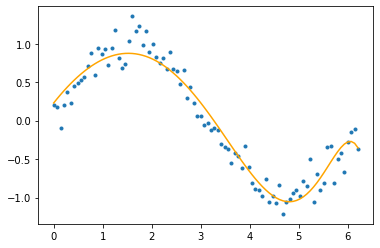

,rss,intercept,coef_x1_1,coef_x1_2,coef_x1_3,coef_x1_4,coef_x1_5,coef_x1_6,coef_x1_7,coef_x1_8,coef_x1_9,coef_x1_10,coef_x1_11,coef_x1_12,coef_x1_13,coef_x1_14,coef_x1_15
alpha_0.001,2.7,0.23,0.8,-0.22,-0.021,-0.0002,0.00029,6.5e-05,9.7e-06,1.1e-06,9.3e-08,1.5e-09,-1.4e-09,-4e-10,-7.2e-11,-1e-11,-8.7e-13


In [9]:
plt.plot(data1['x1_1'], data1['y1'], '.')
plt.plot(data1['x1_1'], y1_pred, color='orange')
plt.show()

pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

## 2.2 Ridge Regression for dataset-2

   x2_1   y2
0     1 0.66
1  0.73 0.51
2  0.93 0.47
3  0.81 0.46
4  0.82 0.48


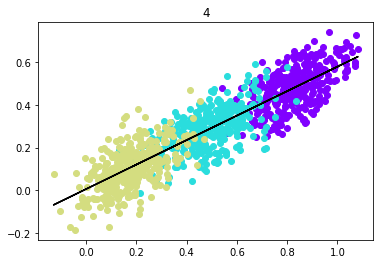

,rss,intercept,coef_x2_0
alpha_0.001,7,0.0056,0.57


In [10]:
import pandas as pd
from sklearn.linear_model import Ridge

data2 = pd.DataFrame()
for i in range(0, dim2):
  colname = 'x2_%d'%(i+1)
  data2[colname] = x2[:,i]
data2['y2'] = y2
print(data2.head())

predictors = ['x2_%d'%(i+1) for i in range(0,dim2)]
alpha = 0.001

col = ['rss','intercept'] + ['coef_x2_%d'%i for i in range(0,dim2)]
ind = ['alpha_%.2g'%alpha]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
coef_matrix_ridge.iloc[0], y2_pred = ridge_regression(data2, predictors, alpha, "y2")
if dim2==1:
  colors = plt.cm.rainbow(np.linspace(0, 1, k))
  plt.title(k)
  for i in range(size2):
    for j in range(k):
      if Y[i] == j:
          plt.scatter(x2[i], y2[i], color=colors[j])
  plt.plot(data2['x2_1'], y2_pred, color='black')
  plt.show()

pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

# 3. Implement Cross Validation

## 3.1 Manually applying k-fold cross validation to find optimum alpha for dataset-1 and dataset-2

In [11]:
import pandas as pd
def getData1(x1, y1):
  data1 = pd.DataFrame(np.column_stack([x1,y1]),columns=['x1_1','y1'])
  for i in range(2,16):
    colname = 'x1_%d'%i
    data1[colname] = data1['x1_1']**i
  return data1
def getData2(x2, y2, dim):
  data2 = pd.DataFrame()
  for i in range(0, dim):
    colname = 'x2_%d'%(i+1)
    data2[colname] = x2[:,i]
  data2['y2'] = y2
  return data2
def ridgeRegressionPredictor(train_data, alpha, num, dim, test_data):
  predictors = ['x%d_%d'%(num,i) for i in range(1,dim+1)]

  ridgereg = Ridge(alpha=alpha,normalize=True)
  ridgereg.fit(train_data[predictors],train_data['y%d'%num])
  y_pred = ridgereg.predict(test_data[predictors])
  
  rss = sum((y_pred-test_data['y%d'%num])**2)
  return rss

In [15]:
%%time

k_fold = 10
alphas = np.linspace(0.0001, 0.9999, 1000)
# for dataset-1
opt_avg_rss = float('inf')
data1 = getData1(x1, y1)
for a in alphas:
  rss = 0
  for i in range(0, k_fold):
    test_idx_list = [idx for idx in range(i*(size1//k_fold), (i+1)*(size1//k_fold))]
    train_idx_list = [idx for idx in range(0, i*(size1//k_fold))]
    test_data = data1.loc[test_idx_list]
    train_idx_list.extend([idx for idx in range((i+1)*(size1//k_fold), size1)])
    train_data = data1.loc[train_idx_list]
    rss+=ridgeRegressionPredictor(train_data, a, 1, dim1, test_data)
  avg_rss = rss/k_fold
  if avg_rss < opt_avg_rss:
    opt_avg_rss = avg_rss
    opt_alpha1 = a
print(opt_alpha1)
# for dataset-2
opt_avg_rss = float('inf')
data2 = getData2(x2, y2, dim2)
for a in alphas:
  rss = 0
  for i in range(0, k_fold):
    test_idx_list = [idx for idx in range(i*(size2//k_fold), (i+1)*size2//k_fold)]
    train_idx_list = [idx for idx in range(0, i*(size2//k_fold))]
    test_data = data2.loc[test_idx_list]
    train_idx_list.extend([idx for idx in range((i+1)*(size2//k_fold), size2)])
    train_data = data2.loc[train_idx_list]
    rss+=ridgeRegressionPredictor(train_data, a, 2, dim2, test_data)
  avg_rss = rss/k_fold
  if avg_rss < opt_avg_rss:
    opt_avg_rss = avg_rss
    opt_alpha2 = a
print(opt_alpha2)

0.0001
0.001100800800800801
CPU times: user 1min 20s, sys: 139 ms, total: 1min 21s
Wall time: 1min 21s


## 3.2 Using RidgeCV and applying k-fold cross validation to find optimum alpha for dataset-1 and dataset-2

In [13]:
%%time

from sklearn.linear_model import RidgeCV

#for dataset-1
data1 = getData1(x1, y1)
X = data1[['x%d_%d'%(1,i+1) for i in range(0,dim1)]]
y = data1[['y1']]
clf1 = RidgeCV(alphas=alphas, cv=k_fold, normalize=True).fit(X, y)
y_pred = clf1.predict(X).reshape(size1,)
print(clf1.alpha_)

#for dataset-2
data2 = getData2(x2, y2, dim2)
X = data2[['x%d_%d'%(2,i+1) for i in range(0,dim2)]]
y = data2[['y2']]
clf2 = RidgeCV(alphas=alphas, cv=k_fold, normalize=True).fit(X, y)
y_pred = clf2.predict(X).reshape(size2,)
print(clf2.alpha_)

0.0001
0.0021016016016016017
CPU times: user 1min 28s, sys: 223 ms, total: 1min 28s
Wall time: 1min 29s


## 3.3 Plotting optimum alpha found using both methods for dataset-1 and dataset-2

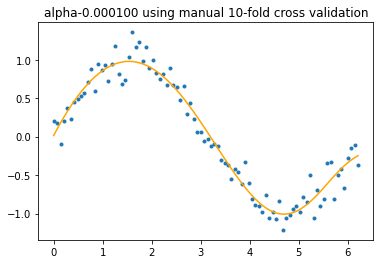

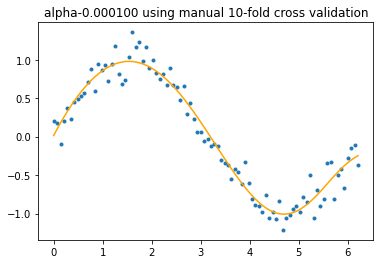

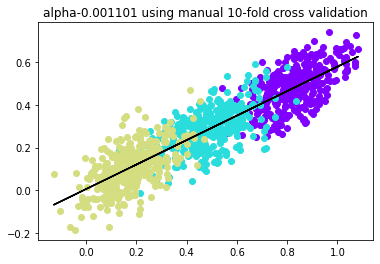

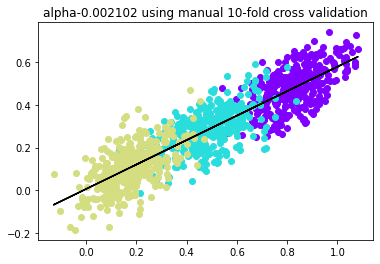

In [16]:
#for dataset-1 manual k-fold result plotting
predictors = ['x1_%d'%(i+1) for i in range(0,dim1)]
alpha = opt_alpha1

col = ['rss','intercept'] + ['coef_x1_%d'%(i+1) for i in range(0,dim1)]
ind = ['alpha_%.2g'%alpha]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
coef_matrix_ridge.iloc[0], y1_pred = ridge_regression(data1, predictors, alpha, "y1")

plt.title("alpha-%f using manual %d-fold cross validation"%(alpha, k_fold))
plt.plot(data1['x1_1'], data1['y1'], '.')
plt.plot(data1['x1_1'], y1_pred, color='orange')
plt.show()

#for dataset-1 RidgeCV k-fold result plotting
alpha = clf1.alpha_

col = ['rss','intercept'] + ['coef_x1_%d'%(i+1) for i in range(0,dim1)]
ind = ['alpha_%.2g'%alpha]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
coef_matrix_ridge.iloc[0], y1_pred = ridge_regression(data1, predictors, alpha, "y1")

plt.title("alpha-%f using manual %d-fold cross validation"%(alpha, k_fold))
plt.plot(data1['x1_1'], data1['y1'], '.')
plt.plot(data1['x1_1'], y1_pred, color='orange')
plt.show()

#for dataset-2 manual k-fold result plotting
predictors = ['x2_%d'%(i+1) for i in range(0,dim2)]
alpha = opt_alpha2

col = ['rss','intercept'] + ['coef_x2_%d'%i for i in range(0,dim2)]
ind = ['alpha_%.2g'%alpha]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
coef_matrix_ridge.iloc[0], y2_pred = ridge_regression(data2, predictors, alpha, "y2")
if(dim2==1):
  colors = plt.cm.rainbow(np.linspace(0, 1, k))
  plt.title("alpha-%f using manual %d-fold cross validation"%(alpha, k_fold))
  for i in range(size2):
    for j in range(k):
      if Y[i] == j:
          plt.scatter(x2[i], y2[i], color=colors[j])
  plt.plot(data2['x2_1'], y2_pred, color='black')
  plt.show()

#for dataset-2 RidgeCV k-fold result plotting
alpha = clf2.alpha_

col = ['rss','intercept'] + ['coef_x2_%d'%i for i in range(0,dim2)]
ind = ['alpha_%.2g'%alpha]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
coef_matrix_ridge.iloc[0], y2_pred = ridge_regression(data2, predictors, alpha, "y2")
if(dim2==1):
  colors = plt.cm.rainbow(np.linspace(0, 1, k))
  plt.title("alpha-%f using manual %d-fold cross validation"%(alpha, k_fold))
  for i in range(size2):
    for j in range(k):
      if Y[i] == j:
          plt.scatter(x2[i], y2[i], color=colors[j])
  plt.plot(data2['x2_1'], y2_pred, color='black')
  plt.show()